In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms

### Classificação

In [3]:
MNIST = datasets.MNIST('.', train=False, transform=transforms.ToTensor(), download=True)

In [4]:
dado, rotulo = MNIST[0]
dado.size()

torch.Size([1, 28, 28])

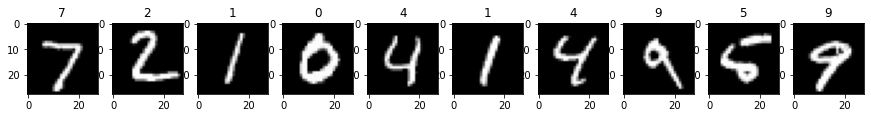

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    dado, rotulo = MNIST[i]
    axs[i].imshow(dado[0], cmap='gray')
    axs[i].set_title(str(rotulo))

### Detecção

In [6]:
# Descomente a linha abaixo caso seja a primeira vez rodando o programa
# VOC = datasets.VOCDetection('./', image_set='train', download=True, transform=transforms.ToTensor())

# Comente a linha abaixo caso seja a primeira vez rodando o programa
VOC = datasets.VOCDetection('./', image_set='train', download=False, transform=transforms.ToTensor())

In [7]:
dado, rotulo = VOC[0]
dado.size()

torch.Size([3, 442, 500])

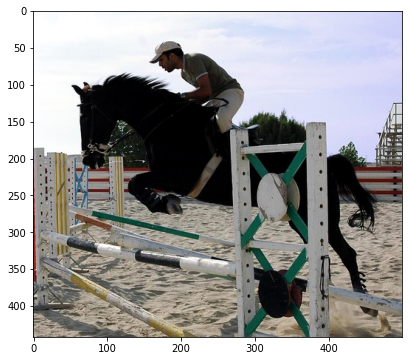

In [8]:
dado = dado.permute(1,2,0)

plt.figure(figsize = (8, 6))
plt.imshow(dado)

In [9]:
rotulo

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

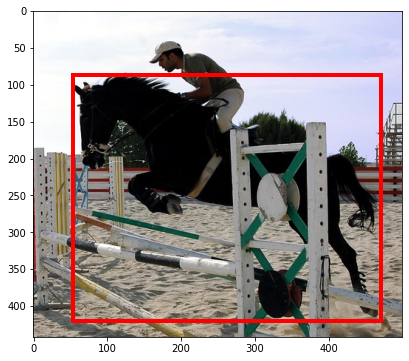

In [10]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(dado)

w, h = xmax - xmin, ymax - ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth=4)
ax.add_patch(rect)
plt.show()

### Segmentação

In [12]:
VOCs = datasets.VOCSegmentation('./',
                               year='2012',
                               image_set='val',
                               download=False,
                               transform=transforms.ToTensor(),
                               target_transform=transforms.ToTensor())

In [13]:
dado, rotulo = VOCs[0]

dado.size()

torch.Size([3, 366, 500])

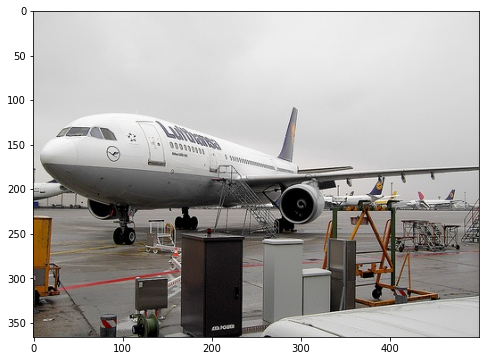

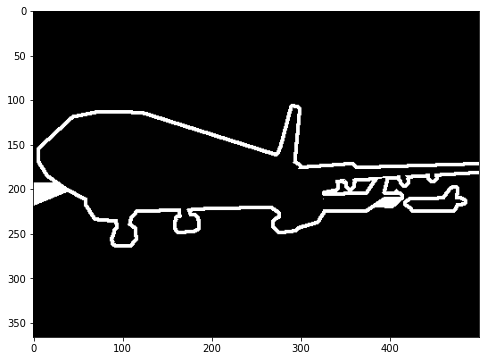

In [14]:
dado = dado.permute(1,2,0)

plt.figure(figsize=(8, 6))
plt.imshow(dado)


plt.figure(figsize=(8, 6))
plt.imshow(rotulo[0], cmap='gray')